<a href="https://colab.research.google.com/github/simply-sankalp/GHI-forecast/blob/main/statistical_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving merged_rajasthan_filtered.xlsx to merged_rajasthan_filtered.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, expon, weibull_min, kstest, norm
import io

In [49]:
df = pd.read_excel(io.BytesIO(uploaded['merged_rajasthan_filtered.xlsx']))
ghi_data = df['GHI'].dropna().values
ghi_data = ghi_data[ghi_data > 100]

In [50]:
# GAMMA DISTRIBUTION
gamma_params = gamma.fit(ghi_data)
gamma_shape, gamma_loc, gamma_scale = gamma_params

In [51]:
# EXPONENTIAL DISTRIBUTION
expon_params = expon.fit(ghi_data)
expon_loc, expon_scale = expon_params

In [52]:
# WEIBULL DISTRIBUTION
weibull_params = weibull_min.fit(ghi_data, floc=0)
weibull_c, weibull_loc, weibull_scale = weibull_params

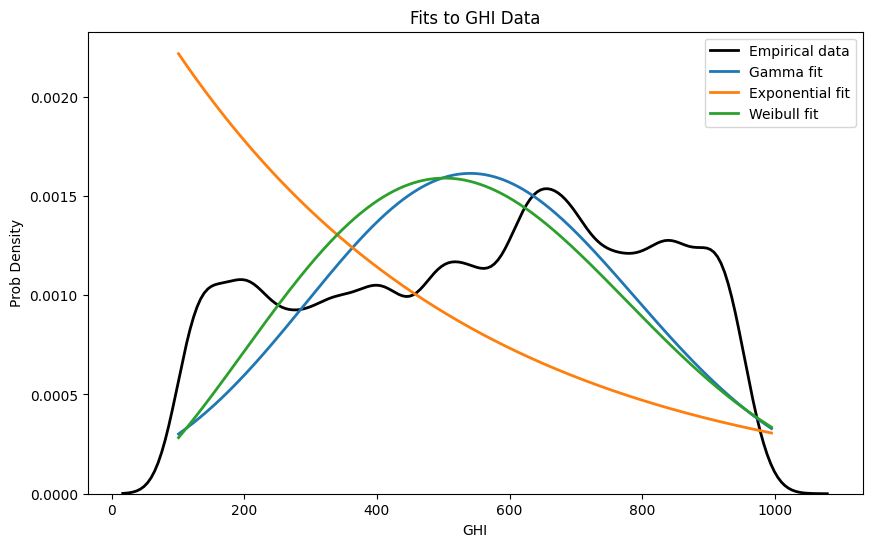

In [53]:
x = np.linspace(ghi_data.min(), ghi_data.max(), 1000)
plt.figure(figsize=(10,6))
sns.kdeplot(ghi_data, color='black', label='Empirical data', linewidth=2)
plt.plot(x, gamma.pdf(x, *gamma_params), label='Gamma fit', lw=2)
plt.plot(x, expon.pdf(x, *expon_params), label='Exponential fit', lw=2)
plt.plot(x, weibull_min.pdf(x, *weibull_params), label='Weibull fit', lw=2)
plt.xlabel('GHI')
plt.ylabel('Prob Density')
plt.legend()
plt.title('Fits to GHI Data')
plt.show()

In [54]:
ks_gamma = kstest(ghi_data, 'gamma', gamma_params)
ks_expon = kstest(ghi_data, 'expon', expon_params)
ks_weibull = kstest(ghi_data, 'weibull_min', weibull_params)
print(f'KS test (Gamma): D={ks_gamma.statistic:.3f}, p={ks_gamma.pvalue:.3g}')
print(f'KS test (Exponential): D={ks_expon.statistic:.3f}, p={ks_expon.pvalue:.3g}')
print(f'KS test (Weibull): D={ks_weibull.statistic:.3f}, p={ks_weibull.pvalue:.3g}')

KS test (Gamma): D=0.063, p=4.09e-178
KS test (Exponential): D=0.184, p=0
KS test (Weibull): D=0.078, p=4.71e-274


In [55]:
def compute_aic(n_params, loglike, n_obs):
    return 2 * n_params - 2 * loglike

def log_likelihood_dist(dist, data, params):
    return np.sum(dist.logpdf(data, *params))

ll_gamma = log_likelihood_dist(gamma, ghi_data, gamma_params)
ll_expon = log_likelihood_dist(expon, ghi_data, expon_params)
ll_weibull = log_likelihood_dist(weibull_min, ghi_data, weibull_params)

aic_gamma = compute_aic(3, ll_gamma, len(ghi_data))
aic_expon = compute_aic(2, ll_expon, len(ghi_data))
aic_weibull = compute_aic(3, ll_weibull, len(ghi_data))

print(f'Gamma:   LogL={ll_gamma:.2f}, AIC={aic_gamma:.2f}')
print(f'Expon:   LogL={ll_expon:.2f}, AIC={aic_expon:.2f}')
print(f'Weibull: LogL={ll_weibull:.2f}, AIC={aic_weibull:.2f}')

Gamma:   LogL=-361480.54, AIC=722967.09
Expon:   LogL=-371129.16, AIC=742262.32
Weibull: LogL=-360684.93, AIC=721375.87


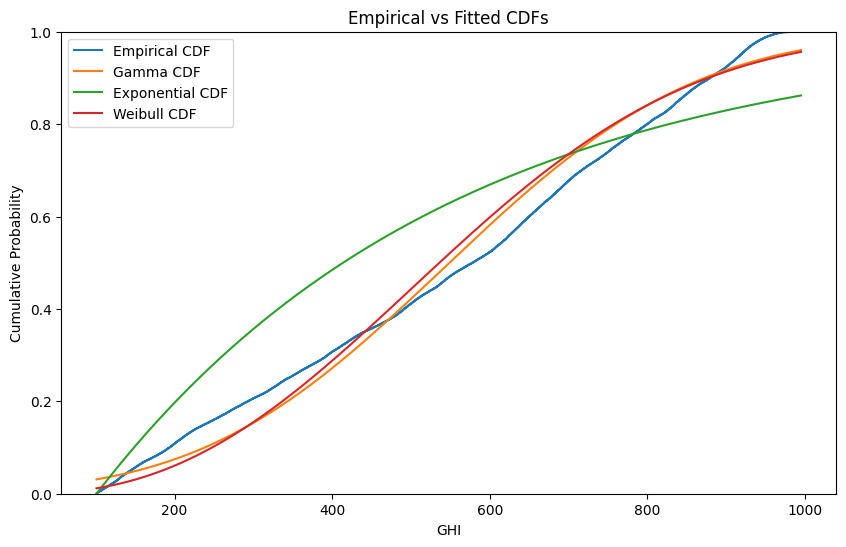

In [56]:
plt.figure(figsize=(10,6))
sns.ecdfplot(ghi_data, label='Empirical CDF')
plt.plot(x, gamma.cdf(x, *gamma_params), label='Gamma CDF')
plt.plot(x, expon.cdf(x, *expon_params), label='Exponential CDF')
plt.plot(x, weibull_min.cdf(x, *weibull_params), label='Weibull CDF')
plt.xlabel('GHI')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.title('Empirical vs Fitted CDFs')
plt.show()